<a href="https://colab.research.google.com/github/srimaailuri/Machine_learning/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from keras.models import Sequential
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
df=load_breast_cancer(as_frame=True)

In [4]:
df=df.frame

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
df.shape

(569, 31)

In [7]:
X=df.drop('target',axis='columns')

In [8]:
y=df['target']

In [9]:
scaler = StandardScaler()
scaler.fit(X)
X_sc= scaler.transform(X)

Text(0, 0.5, 'Cumulative explained variance')

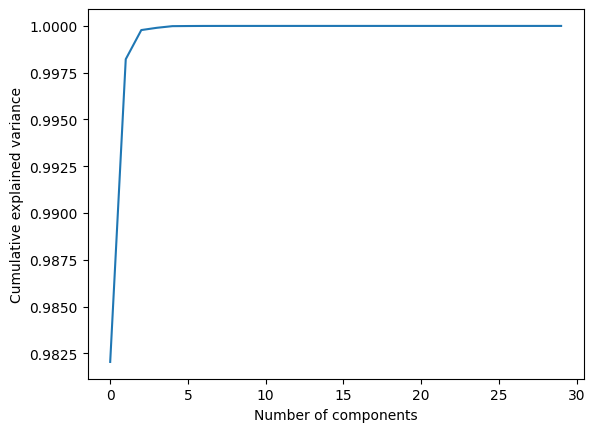

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [11]:
n_components=2
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
print(df_pca1)

             PC1         PC2
0    1160.142574 -293.917544
1    1269.122443   15.630182
2     995.793889   39.156743
3    -407.180803  -67.380320
4     930.341180  189.340742
..           ...         ...
564  1414.126684  110.222492
565  1045.018854   77.057589
566   314.501756   47.553525
567  1124.858115   34.129225
568  -771.527622  -88.643106

[569 rows x 2 columns]


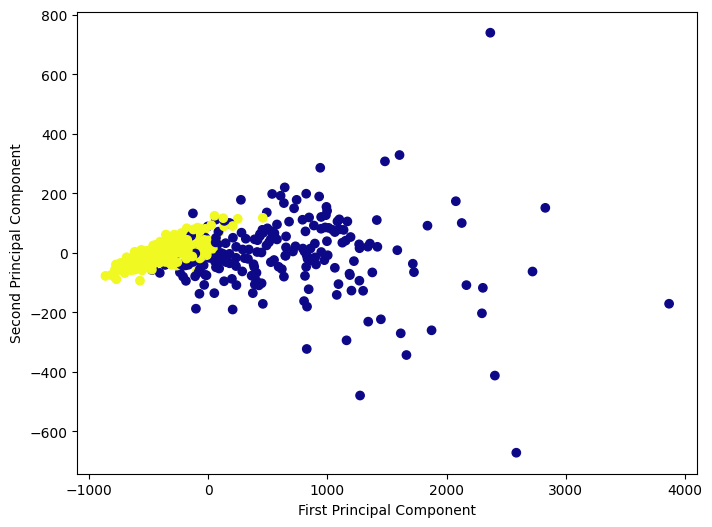

In [12]:
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=y,
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [13]:
pca.components_

array([[ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,
         5.16826469e-01,  4.23694535e-06,  4.05260047e-05,
         8.19399539e-05,  4.77807775e-05,  7.07804332e-06,
        -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
         2.23634150e-03,  5.57271669e-02, -8.05646029e-07,
         5.51918197e-06,  8.87094462e-06,  3.27915009e-06,
        -1.24101836e-06, -8.54530832e-08,  7.15473257e-03,
         3.06736622e-03,  4.94576447e-02,  8.52063392e-01,
         6.42005481e-06,  1.01275937e-04,  1.68928625e-04,
         7.36658178e-05,  1.78986262e-05,  1.61356159e-06],
       [ 9.28705650e-03, -2.88160658e-03,  6.27480827e-02,
         8.51823720e-01, -1.48194356e-05, -2.68862249e-06,
         7.51419574e-05,  4.63501038e-05, -2.52430431e-05,
        -1.61197148e-05, -5.38692831e-05,  3.48370414e-04,
         8.19640791e-04,  7.51112451e-03,  1.49438131e-06,
         1.27357957e-05,  2.86921009e-05,  9.36007477e-06,
         1.22647432e-05,  2.89683790e-07, -5.68673345e-

In [14]:
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std

In [15]:
c=Z.cov()

In [16]:
eigenvalues, eigenvectors = np.linalg.eig(c)

In [17]:
eigenvalues

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 1.33044823e-04,
       7.48803097e-04, 1.58933787e-03, 6.90046388e-03, 8.17763986e-03,
       1.54812714e-02, 1.80550070e-02, 2.43408378e-02, 2.74394025e-02,
       3.11594025e-02, 2.99728939e-02])

In [18]:
eigenvectors

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
        -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02,  1.07922421e-01,
        -1.57841960e-01, -3.87061187e-02, -4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
from sklearn.model_selection import train_test_split

In [38]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.2, random_state=30)

In [43]:
%%timeit
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train_pca)

21.9 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train_pca)

LogisticRegression(max_iter=1000)

In [45]:
model_pca.score(X_test_pca, y_test_pca)

0.9385964912280702

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [47]:
%%timeit
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

33.4 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9210526315789473

# ***With PCA time taken is -- 21.9 ms ± 1.6 ms and accuracy is 93.85***
# ***Without PCA time taken is -- 33.4 ms ± 2.08 and accuracy is 92.10 ***